 **ARAV SOOD\
E22011**

## Study 2:
## Multiple Linear Regression - Coefficient

> Problem:\
  Estimating **θ** such that ▽RSS = 0 i.e. the root of the sum of squares is
  minimised.

 Here, θ symbolises the matrix of the coefficient vectors.

> Analytical Solution:\
  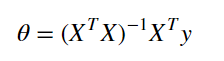


> Aim of the study:\
  To verify the Analytical Solution of the Multiple Linear Regression as mentioned above with the results obtained by using statsmodels.api


In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [4]:
#Importing the Cars Dataset
cars = pd.read_csv("https://raw.githubusercontent.com/Halaarav/AML/main/cars.csv")
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130,3504,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165,3693,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150,3436,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150,3433,12.0,70,US
4,Ford Torino,17.0,8,302.0,140,3449,10.5,70,US


For this study, we will be using predictors as **Displacement, Horsepower and  Weight.**\
The target variable will be **MPG**.


In [7]:
X = cars[["Displacement","Horsepower","Weight"]]  #Predictors
y = cars.MPG                                      #Target Variable

We will need to add a constant column to the predictor space.\
This is necessary for the calculation of the intercept term in multiple linear regression. 

In [12]:
X = sm.add_constant(X) #Adding a constant column to the predictors using statsmodels.

/Users/arav/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


> Calculating coefficients using Analytical Solution:

In [17]:
θ = np.linalg.inv(((X.T)@X))@(X.T)@y
θ

0    44.499978
1    -0.007919
2    -0.039377
3    -0.005313
dtype: float64



Equation A will be:

    MPG_i = 44.499978 - 0.007919(Displacement_i) - 0.039377(Horsepower_i) - 0.005313(Weight_i) 

Calculating coefficients using statsmodels.api:

In [20]:
mr = sm.OLS(y,X).fit() #Fitting the model on our target and the predictors

In [21]:
mr.params               # Gives us the coefficients 

const           44.499978
Displacement    -0.007919
Horsepower      -0.039377
Weight          -0.005313
dtype: float64

Equation B will be:

    MPG_i = 44.499978 - 0.007919(Displacement_i) - 0.039377(Horsepower_i) - 0.005313(Weight_i) 

In [23]:
print(mr.summary())

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     233.5
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           1.08e-87
Time:                        16:14:51   Log-Likelihood:                -1234.9
No. Observations:                 406   AIC:                             2478.
Df Residuals:                     402   BIC:                             2494.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           44.5000      1.394     31.929   

> Conclusion:\
Comparing Equation A and equation B we can clearly see that the results obtained are similar.
We can conclude by saying that both th approaches follow the fundamental idea of linear regression which is "Estimating θ (where θ = the coefficient vectors) by reducing the root of sum of sqaured error.